## Used Cars Price Prediction and Evaluation

In [356]:
import pandas as pd
import numpy as np

In [357]:
df = pd.read_csv("cars_price.csv")

In [358]:
df.head()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           40000 non-null  int64  
 1   make                 40000 non-null  object 
 2   model                40000 non-null  object 
 3   priceUSD             40000 non-null  int64  
 4   year                 40000 non-null  int64  
 5   condition            40000 non-null  object 
 6   mileage(kilometers)  40000 non-null  float64
 7   fuel_type            40000 non-null  object 
 8   volume(cm3)          39970 non-null  float64
 9   color                40000 non-null  object 
 10  transmission         40000 non-null  object 
 11  drive_unit           38655 non-null  object 
 12  segment              36245 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 4.0+ MB


In [360]:
df.describe()

,Unnamed: 0,priceUSD,year,mileage(kilometers),volume(cm3)
count,40000.00000,40000.000000,40000.000000,4.000000e+04,39970.000000
mean,19999.50000,7430.383775,2003.485625,2.434332e+05,2103.201676
std,11547.14972,8338.242134,8.114896,3.167033e+05,938.724653
min,0.00000,95.000000,1938.000000,0.000000e+00,500.000000
25%,9999.75000,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,19999.50000,5350.000000,2004.000000,2.280000e+05,1995.000000
75%,29999.25000,9850.000000,2010.000000,3.087610e+05,2300.000000
max,39999.00000,195000.000000,2019.000000,9.999999e+06,20000.000000


In [361]:
# Finding number of unique values in each column
{column: len(df[column].unique()) for column in df.columns if df.dtypes[column] == 'object'}

{'make': 93,
 'model': 991,
 'condition': 3,
 'fuel_type': 3,
 'color': 13,
 'transmission': 2,
 'drive_unit': 5,
 'segment': 10}

In [362]:
corr_matrix = df.corr()
corr_matrix['priceUSD'].sort_values(ascending=False)

priceUSD               1.000000
year                   0.608822
volume(cm3)            0.275745
Unnamed: 0             0.005429
mileage(kilometers)   -0.171794
Name: priceUSD, dtype: float64

<AxesSubplot:xlabel='year', ylabel='priceUSD'>

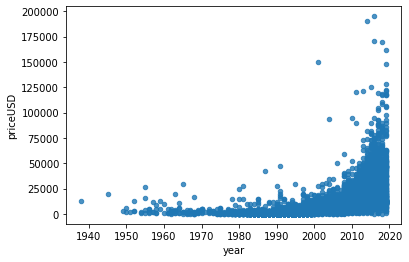

In [363]:
df.plot(kind="scatter", x="year", y="priceUSD", alpha=0.8)

<AxesSubplot:xlabel='volume(cm3)', ylabel='priceUSD'>

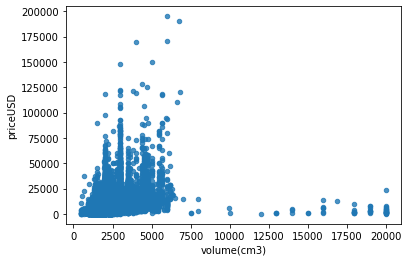

In [364]:
df.plot(kind="scatter", x="volume(cm3)", y="priceUSD", alpha=0.8)

<AxesSubplot:xlabel='mileage(kilometers)', ylabel='priceUSD'>

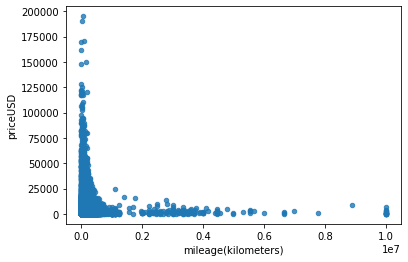

In [365]:
df.plot(kind="scatter", x="mileage(kilometers)", y="priceUSD", alpha=0.8)

In [366]:
df = df.drop('model',axis=1)

# For plotting histogram


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'priceUSD'}>],
       [<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'mileage(kilometers)'}>],
       [<AxesSubplot:title={'center':'volume(cm3)'}>, <AxesSubplot:>]],
      dtype=object)

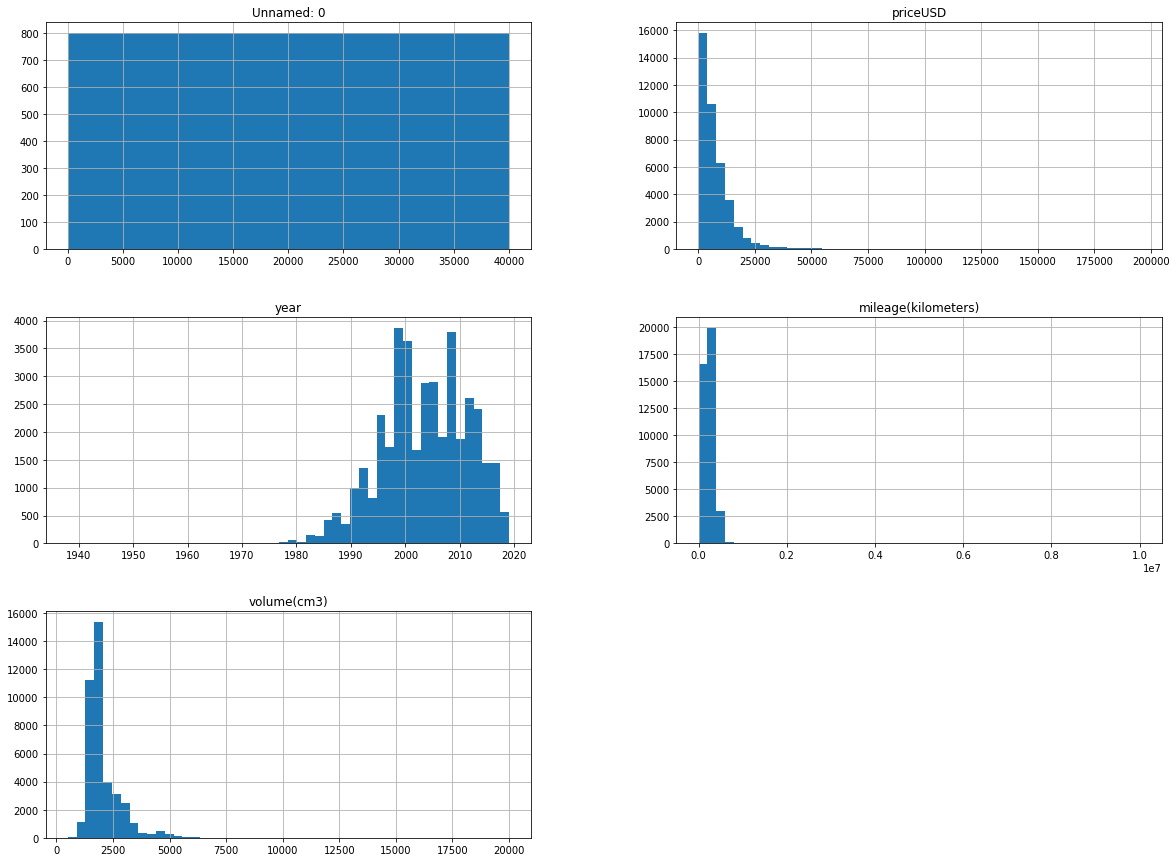

In [367]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15))

# Encoding catogarical data

In [368]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [369]:
df = onehot_encode(
    df,
    ['make', 'condition', 'mileage(kilometers)', 'fuel_type','color','transmission','drive_unit','segment'],
    ['make', 'condition', 'mileage(kilometers)', 'fuel_type','color','transmission','drive_unit','segment']
)



# Train-Test Split

In [370]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(df, test_size=0.1, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 36000
Rows in test set: 4000



In [371]:
# from sklearn.model_selection import StratifiedShuffleSplit
# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, test_index in split.split(df, df['fuel_type']):
#     strat_train_set = df.loc[train_index]
#     strat_test_set = df.loc[test_index]

In [372]:
train_set.describe()

,Unnamed: 0,priceUSD,year,volume(cm3),make_acura,make_alfa-romeo,make_aro,make_aston-martin,make_audi,make_bentley,...,drive_unit_rear drive,segment_A,segment_B,segment_C,segment_D,segment_E,segment_F,segment_J,segment_M,segment_S
count,36000.000000,36000.000000,36000.000000,35972.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,...,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000
mean,20009.273111,7428.111028,2003.481056,2104.579284,0.001778,0.004333,0.000028,0.000028,0.071194,0.000167,...,0.120722,0.008056,0.078000,0.188611,0.225528,0.110167,0.016333,0.153194,0.113083,0.013722
std,11530.776796,8330.648613,8.121410,948.637399,0.042127,0.065686,0.005270,0.005270,0.257153,0.012909,...,0.325809,0.089392,0.268175,0.391205,0.417935,0.313102,0.126756,0.360180,0.316699,0.116337
min,0.000000,95.000000,1938.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10042.750000,2350.000000,1998.000000,1600.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20005.500000,5350.000000,2004.000000,1997.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29990.250000,9800.000000,2010.000000,2300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39999.000000,190141.000000,2019.000000,20000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [373]:
X_train = train_set.drop(['Unnamed: 0','priceUSD'],axis=1)
y_train = train_set['priceUSD']

X_test = test_set.drop(['Unnamed: 0','priceUSD'],axis=1)
y_test = test_set['priceUSD']

In [374]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(36000, 6521)
(36000,)
(4000, 6521)
(4000,)


# Missing attributes

In [375]:
for column in X_train.columns:
    X_train[column] = X_train[column].fillna(X_train[column].mean())

In [376]:
for column in X_test.columns:
    X_test[column] = X_test[column].fillna(X_test[column].mean())

# Creating a pipeline

In [377]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Selecting the desired model

In [378]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor(n_estimators = 200, random_state = 0)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

# Evaluating the model

In [379]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(X_train)
mse = mean_squared_error(y_train, housing_predictions)
rmse = np.sqrt(mse)

In [380]:
print(rmse)

1143.2005250478492


# Cross Validation Evaluation

In [381]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
# rmse_scores = np.sqrt(-scores)

In [382]:
# rmse_scores

In [383]:
# def print_scores(scores):
#     print("Scores:", scores)
#     print("Mean: ", scores.mean())
#     print("Standard deviation: ", scores.std())

In [384]:
# print_scores(rmse_scores)